In [1]:
import numpy as np
import pandas as pd
from gsmmutils import ModelValidator, MyModel
import gsmmutils
gsmmutils.model.model_validator.DATA_PATH =  "../results"
import seaborn as sns
DATA_PATH = r"C:\Users\Bisbii\PythonProjects\GSMMutils\data"
from os.path import join
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(35,8.27)})
from cobra.flux_analysis import pfba

In [2]:
ds = MyModel(join(DATA_PATH, 'models/model_ds.xml'), 'e_Biomass__cytop')
ds.set_prism_reaction("PRISM_white_LED__extr")
print(ds.slim_optimize())
ng = MyModel(join(DATA_PATH, 'models/model_ng.xml'), 'e_Biomass__cytop')
ng.set_prism_reaction("PRISM_solar_litho__extr")
print(ng.slim_optimize())
pl = MyModel(join(DATA_PATH, 'models/model_pl.xml'), 'e_Biomass__cytop')
pl.set_prism_reaction("PRISM_fluorescent_warm_18W__extr")
print(pl.slim_optimize())

Loading

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-15
Reactions: 4514
Metabolites: 3680
Genes: 1699
Model loaded
0.20061690015141123
Loading

Reactions: 4485
Metabolites: 3793
Genes: 1333
Model loaded
0.0301824095942282
Loading

Reactions: 4740
Metabolites: 4182
Genes: 1353
Model loaded
0.23277053183594706


In [6]:
sol = pfba(ds)
ds_original_co2 = sol.fluxes["EX_C00011__dra"]
ds.summary(sol)

Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__dra,6.743,0,0.00%
C00009__extr,EX_C00009__dra,0.03278,0,0.00%
C00011__extr,EX_C00011__dra,8.21,1,99.70%
C00059__extr,EX_C00059__dra,0.02218,0,0.00%
C00080__extr,EX_C00080__dra,0.0558,0,0.00%
C00120__extr,EX_C00120__dra,0.0009328,10,0.11%
C00205__extr,EX_C00205__dra,235.4,0,0.00%
C00244__extr,EX_C00244__dra,0.5305,0,0.00%
C00305__extr,EX_C00305__dra,0.002294,0,0.00%
C00378__extr,EX_C00378__dra,0.0005361,12,0.08%


In [8]:
sol = pfba(ng)
ng_original_co2 = sol.fluxes["EX_C00011__dra"]
ng.summary(sol)

Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__dra,1.161,0,0.00%
C00009__extr,EX_C00009__dra,0.005525,0,0.00%
C00011__extr,EX_C00011__dra,1.445,1,99.91%
C00059__extr,EX_C00059__dra,0.00445,0,0.00%
C00080__extr,EX_C00080__dra,0.009963,0,0.00%
C00120__extr,EX_C00120__dra,4.91E-05,10,0.03%
C00205__extr,EX_C00205__dra,42.87,0,0.00%
C00244__extr,EX_C00244__dra,0.133,0,0.00%
C00305__extr,EX_C00305__dra,0.0004984,0,0.00%
C00378__extr,EX_C00378__dra,2.822E-05,12,0.02%


In [13]:
co_2uptakes = [10.94, 12.78]

for uptake in co_2uptakes:
    with ng:
        ng.exchanges.EX_C00244__dra.lower_bound = -1000
        ng.exchanges.EX_C00378__dra.lower_bound = 0
        ng.exchanges.EX_C00120__dra.lower_bound = 0
        ng.exchanges.EX_C00011__dra.lower_bound = -uptake
        print(ng.slim_optimize())

0.22758281866837432
0.26516530248517006


In [9]:
sol = pfba(pl)
pl_original_co2 = sol.fluxes["EX_C00011__dra"]
pl.summary(sol)

Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__dra,7.155,0,0.00%
C00009__extr,EX_C00009__dra,0.0361,0,0.00%
C00011__extr,EX_C00011__dra,10.78,1,99.91%
C00059__extr,EX_C00059__dra,0.03808,0,0.00%
C00080__extr,EX_C00080__dra,2.25,0,0.00%
C00120__extr,EX_C00120__dra,0.000366,10,0.03%
C00205__extr,EX_C00205__dra,345,0,0.00%
C00244__extr,EX_C00244__dra,1.466,0,0.00%
C00305__extr,EX_C00305__dra,0.004843,0,0.00%
C00378__extr,EX_C00378__dra,0.0002104,12,0.02%


D. salina

In [17]:
carbon_sources = ["C00267", "C00033",  "C00116"]

with ds as model:
    print(f"Photoautotrophic: {model.slim_optimize()}")

for carbon_source in carbon_sources:
    with ds as model:
        model.reactions.NGAM__lum.bounds= (0, 1000)
        model.exchanges.EX_C00205__dra.lower_bound = 0
        model.exchanges.get_by_id(f"EX_{carbon_source}__dra").lower_bound = ds_original_co2 / model.metabolites.get_by_id(carbon_source+"__extr").elements['C']
        print("Heterotrophic with ", model.metabolites.get_by_id(carbon_source+"__extr").name, model.slim_optimize())
        
for carbon_source in carbon_sources:
    with ds as model:
        model.exchanges.get_by_id(f"EX_{carbon_source}__dra").lower_bound = ds_original_co2 / model.metabolites.get_by_id(carbon_source+"__extr").elements['C']
        print(f"Mixotrophic with ", model.metabolites.get_by_id(carbon_source+"__extr").name, model.slim_optimize())


Photoautotrophic: 0.20061690015141123
Heterotrophic with  alpha-D-Glucose 0.05336963258152157
Heterotrophic with  Acetate 0.005652815847295737
Heterotrophic with  Glycerol 0.07524072162844091
Mixotrophic with  alpha-D-Glucose 0.40123380030281586
Mixotrophic with  Acetate 0.4012338003028232
Mixotrophic with  Glycerol 0.4012338003028245


N. gaditana

In [18]:
carbon_sources = ["C00267", "C00469", "C00181",  "C02336", "C00089", "C00962", "C00116"]

with ng as model:
    print(f"Photoautotrophic: {model.slim_optimize()}")
    
with ng as model:
    model.reactions.NGAM__lum.bounds= (0, 1000)
    model.exchanges.EX_C00205__dra.lower_bound = 0
    model.exchanges.EX_C00244__dra.lower_bound = -1000
    model.exchanges.EX_C00011__dra.lower_bound = ng_original_co2
    for carbon_source in carbon_sources:
        model.exchanges.get_by_id(f"EX_{carbon_source}__dra").lower_bound = ng_original_co2 / model.metabolites.get_by_id(carbon_source+"__extr").elements['C']
        print("Heterotrophic with ", model.metabolites.get_by_id(carbon_source+"__extr").name, model.slim_optimize())
      
with ng as model:
    model.reactions.NGAM__lum.bounds= (0, 1000)
    model.exchanges.EX_C00244__dra.lower_bound = -1000
    model.exchanges.EX_C00011__dra.lower_bound = ng_original_co2
    for carbon_source in carbon_sources:
        model.exchanges.get_by_id(f"EX_{carbon_source}__dra").lower_bound = ng_original_co2 / model.metabolites.get_by_id(carbon_source+"__extr").elements['C']
        print("Mixotrophic with ", model.metabolites.get_by_id(carbon_source+"__extr").name, model.slim_optimize())

with ng as model:
    model.exchanges.EX_C00244__dra.lower_bound = -0.133
    print(f"Autotrophic with nitrate: {model.slim_optimize()}")

with ng as model:
    model.exchanges.EX_C00244__dra.lower_bound = 0
    model.exchanges.EX_C00088__dra.lower_bound = -0.133
    print(f"Autotrophic with nitrite: {model.slim_optimize()}")
    
with ng as model:
    model.exchanges.EX_C00244__dra.lower_bound = 0
    model.exchanges.EX_C00014__dra.lower_bound = -0.133
    print(f"Autotrophic with ammonia: {model.slim_optimize()}")
    
    
with ng as model:
    model.exchanges.EX_C00244__dra.lower_bound = 0
    model.exchanges.EX_C00086__dra.lower_bound = -0.133/2
    print(f"Autotrophic with urea: {model.slim_optimize()}")

Photoautotrophic: 0.0301824095942282
Heterotrophic with  alpha-D-Glucose 0.009138349980751626
Heterotrophic with  Ethanol 0.029381698019256247
Heterotrophic with  D-Xylose 0.04879480110151199
Heterotrophic with  beta-D-Fructose 0.06785745453124516
Heterotrophic with  Sucrose 0.08642144188601457
Heterotrophic with  beta-D-Galactose 0.10449292685146681
Heterotrophic with  Glycerol 0.12395834412959379
Mixotrophic with  alpha-D-Glucose 0.060364819188441415
Mixotrophic with  Ethanol 0.09054722878268186
Mixotrophic with  D-Xylose 0.12072963837691006
Mixotrophic with  beta-D-Fructose 0.15091204797113758
Mixotrophic with  Sucrose 0.18109445756536535
Mixotrophic with  beta-D-Galactose 0.2112768671595931
Mixotrophic with  Glycerol 0.2414592767538206
Autotrophic with nitrate: 0.030182409594227234
Autotrophic with nitrite: 0.030182409594227907
Autotrophic with ammonia: 0.03018240959422917
Autotrophic with urea: 0.030182409594227307


[-0.00567114  0.04449429]
-13.314029510615496


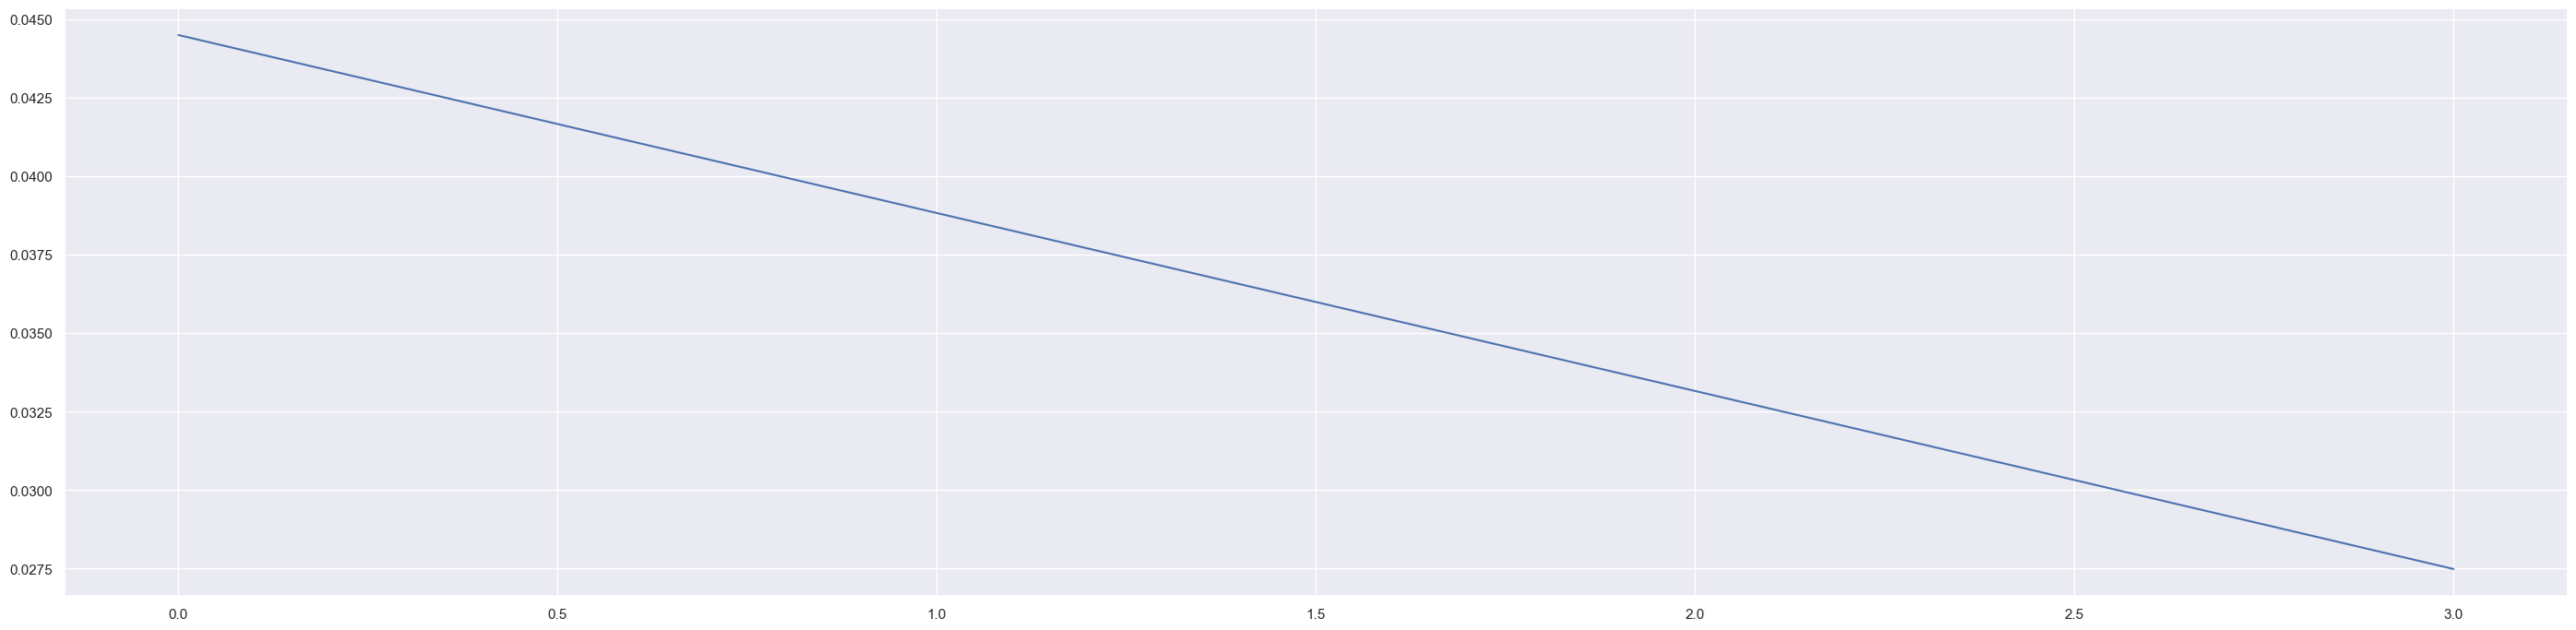

In [20]:
## LL
import numpy as np
ngam_range = np.arange(0, 20, 1)
sim = {}
with pl as model:
    model.exchanges.EX_C00011__dra.lower_bound = 0
    model.exchanges.EX_C00288__dra.lower_bound = -1000
    for ngam in ngam_range:
        model.reactions.NGAM__lum.bounds= (ngam, ngam)
        model.exchanges.EX_C00205__dra.bounds = (-20*3.45, -20*3.45)
        if model.slim_optimize() > 0:
            sim[ngam] = model.slim_optimize()
# plot sim
plt.plot(list(sim.keys()), list(sim.values()))
# get equation
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, list(sim.keys()), list(sim.values()))
print(popt)
print((0.12 - popt[1]) / popt[0])

[-0.00562861  0.23425923]
11.416545199522982


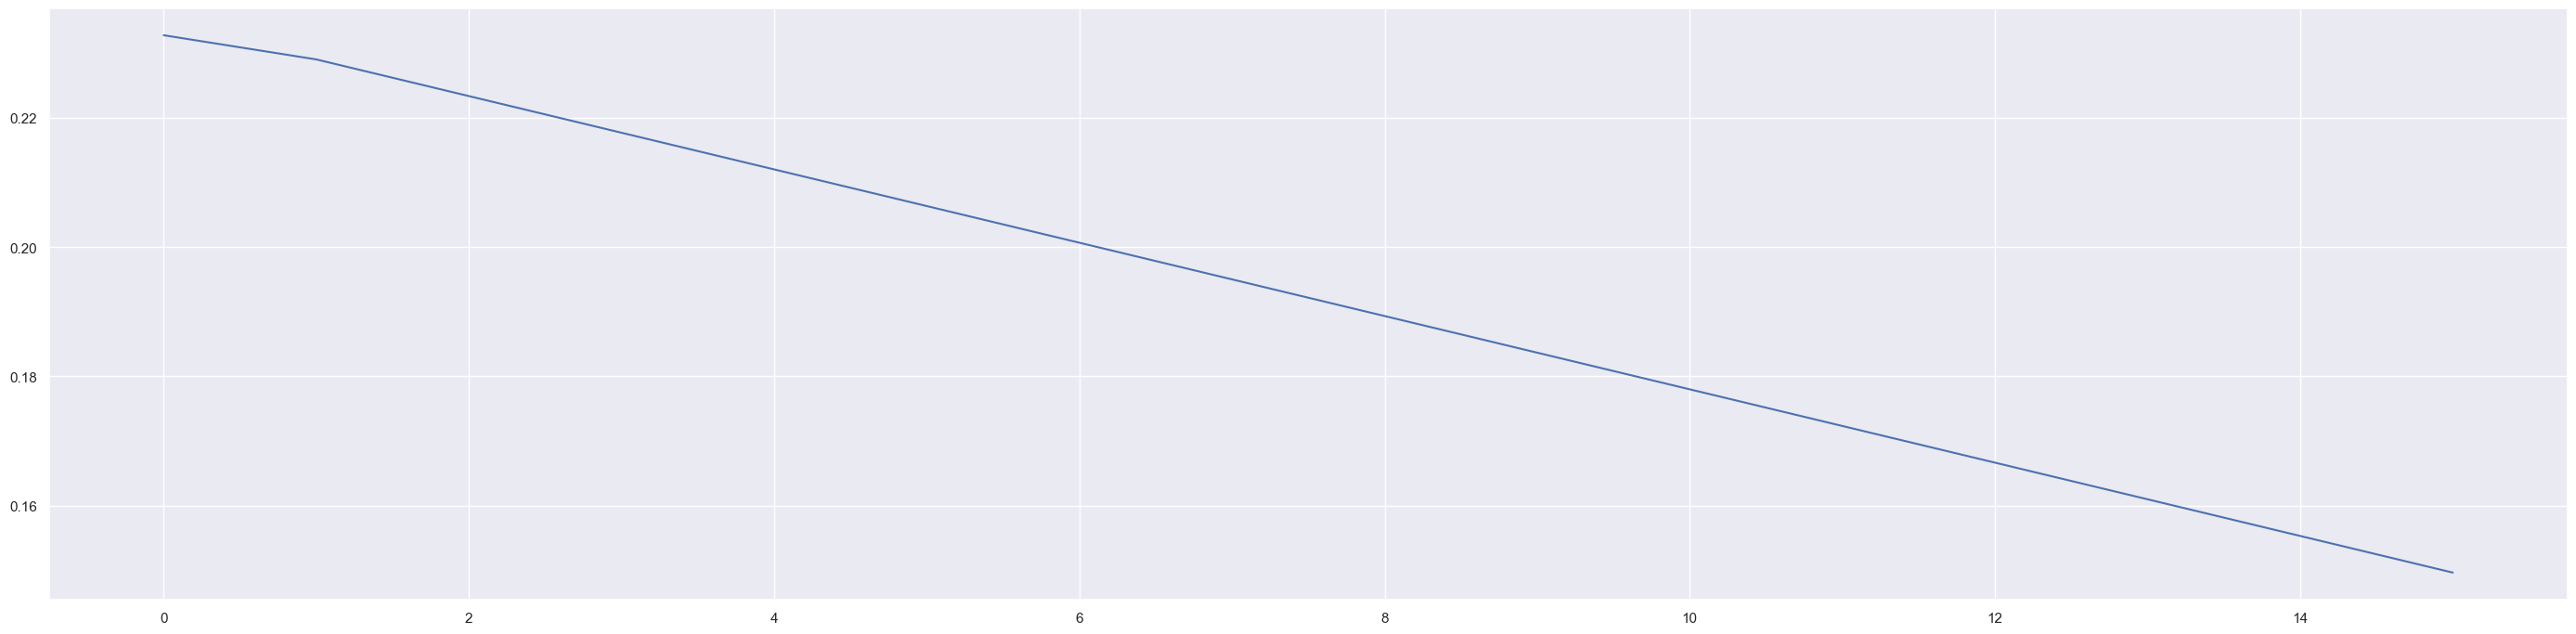

In [21]:
## ML
import numpy as np
ngam_range = np.arange(0, 20, 1)
sim = {}
with pl as model:
    model.exchanges.EX_C00011__dra.lower_bound = pl_original_co2
    for ngam in ngam_range:
        model.reactions.NGAM__lum.bounds= (ngam, ngam)
        model.exchanges.EX_C00205__dra.bounds = (-100*3.45, -100*3.45)
        if model.slim_optimize() > 0:
            sim[ngam] = model.slim_optimize()
# plot sim
plt.plot(list(sim.keys()), list(sim.values()))
# get equation
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, list(sim.keys()), list(sim.values()))
print(popt)
# get x forr y = 0.17
print((0.17 - popt[1]) / popt[0])

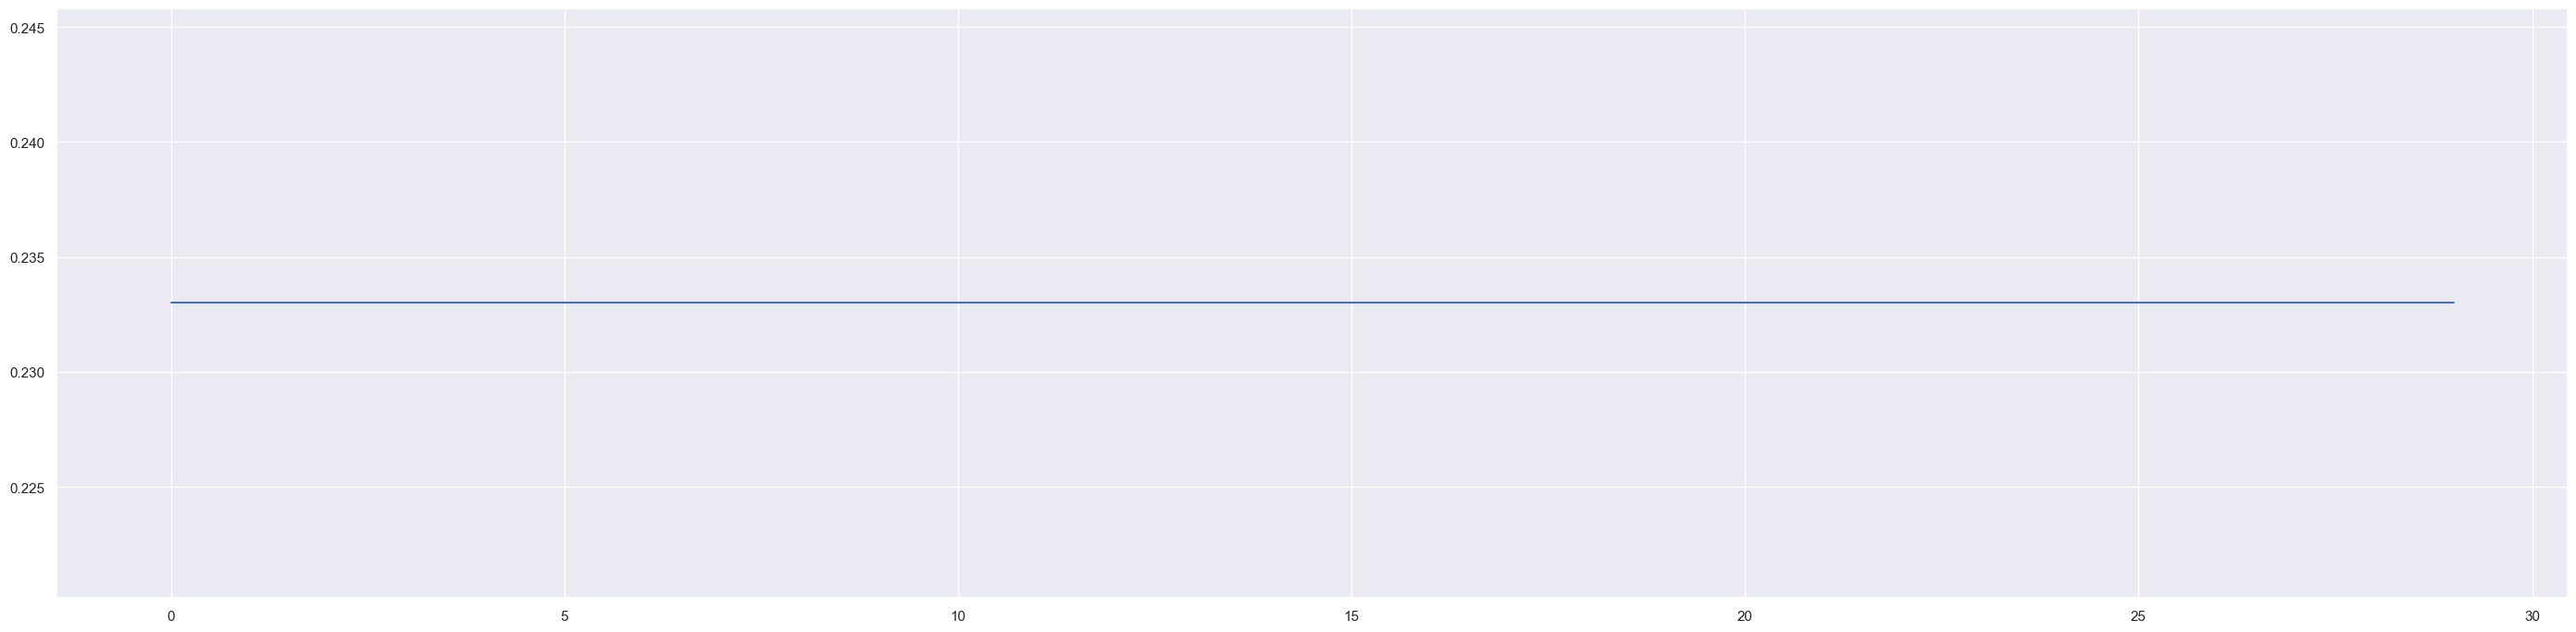

In [23]:
## HL
import numpy as np
ngam_range = np.arange(0, 30, 1)
sim = {}
with pl as model:
    model.exchanges.EX_C00011__dra.lower_bound = 0
    model.exchanges.EX_C00288__dra.lower_bound = pl_original_co2
    for ngam in ngam_range:
        model.reactions.NGAM__lum.bounds= (ngam, ngam)
        model.exchanges.EX_C00205__dra.bounds = (-340*3.45, -340*3.45)
        sol = model.slim_optimize()
        if sol > 0:
            sim[ngam] = round(sol, 3)
# plot sim
plt.plot(list(sim.keys()), list(sim.values()))
# get equation
# from scipy.optimize import curve_fit
# def func(x, a, b):
#     return a*x + b
# popt, pcov = curve_fit(func, list(sim.keys()), list(sim.values()))
# print(popt)
# # get x forr y = 0.17
# print((0.141 - popt[1]) / popt[0])

In [24]:
pl.exchanges.EX_C00011__dra.lower_bound = -10
i = 52
pl.reactions.NGAM__lum.bounds= (i, i)
for rxn in pl.reactions:
    if rxn.upper_bound >= 1000:
        rxn.upper_bound = 10000
    if rxn.lower_bound <= -1000:
        rxn.lower_bound = -10000
pl.exchanges.EX_C00205__dra.bounds = (-340*3.45, -340*3.45)
sol = pfba(pl)
print(sol.fluxes["PSII__lum"])
print(sol.fluxes["PSIc6__lum"])
pl.summary(sol)

90.74495283742085
144.1675219214336


Metabolite,Reaction,Flux,C-Number,C-Flux
C00001__extr,EX_C00001__dra,7.681,0,0.00%
C00009__extr,EX_C00009__dra,0.03349,0,0.00%
C00011__extr,EX_C00011__dra,10,1,99.91%
C00059__extr,EX_C00059__dra,0.03533,0,0.00%
C00080__extr,EX_C00080__dra,0.0011,0,0.00%
C00120__extr,EX_C00120__dra,0.0003396,10,0.03%
C00205__extr,EX_C00205__dra,1173,0,0.00%
C00244__extr,EX_C00244__dra,1.36,0,0.00%
C00305__extr,EX_C00305__dra,0.004493,0,0.00%
C00378__extr,EX_C00378__dra,0.0001952,12,0.02%


P. lutheri

In [25]:
carbon_sources = ["C00267", "C00033", "C00116",  "C00089"]

with pl as model:
    ll_ngam = 0*24
    ml_ngam = 0.45*24
    hl_ngam = 2.182*24
    model.reactions.NGAM__lum.bounds= (ll_ngam, ll_ngam)
    model.exchanges.EX_C00011__dra.lower_bound = 0
    model.exchanges.EX_C00288__dra.lower_bound = -1000
    model.exchanges.EX_C00205__dra.bounds = (-20*3.45, -20*3.45)
    print(f"Photoautotrophic (LL, HCO3): {model.slim_optimize()}")
    model.exchanges.EX_C00205__dra.bounds = (-100*3.45, -100*3.45)
    model.reactions.NGAM__lum.bounds= (ml_ngam, ml_ngam)
    print(f"Photoautotrophic (ML, HCO3): {model.slim_optimize()}")
    model.exchanges.EX_C00205__dra.bounds = (-340*3.45, -340*3.45)
    model.reactions.NGAM__lum.bounds= (hl_ngam, hl_ngam)
    print(f"Photoautotrophic (HL, HCO3): {model.slim_optimize()}")
    model.reactions.NGAM__lum.bounds= (ll_ngam, ll_ngam)
    model.exchanges.EX_C00288__dra.lower_bound = 0
    model.exchanges.EX_C00033__dra.lower_bound = pl_original_co2/2
    model.exchanges.EX_C00205__dra.bounds = (-20*3.45, -20*3.45)
    print(f"Photoautotrophic (LL, Acetate): {model.slim_optimize()}")
    model.exchanges.EX_C00205__dra.bounds = (-100*3.45, -100*3.45)
    model.reactions.NGAM__lum.bounds= (ml_ngam, ml_ngam)
    print(f"Photoautotrophic (ML, Acetate): {model.slim_optimize()}")
    model.exchanges.EX_C00205__dra.bounds = (-340*3.45, -340*3.45)
    model.reactions.NGAM__lum.bounds= (hl_ngam, hl_ngam)
    print(f"Photoautotrophic (HL, Acetate): {model.slim_optimize()}")


with pl as model:
    model.exchanges.EX_C00205__dra.bounds = (-100*3.45, -100*3.45)
    print(f"Photoautotrophic: {model.slim_optimize()}")

# Mixotrophic
with pl as model:
    model.exchanges.EX_C00205__dra.bounds = (-100*3.45, -100*3.45)
    for carbon_source in carbon_sources:
        model.exchanges.get_by_id(f"EX_{carbon_source}__dra").lower_bound = pl_original_co2 / model.metabolites.get_by_id(carbon_source+"__extr").elements['C']
        print("Mixotrophic with ", model.metabolites.get_by_id(carbon_source+"__extr").name, model.slim_optimize())

# Heterotrophic
with pl as model:
    model.exchanges.EX_C00205__dra.lower_bound = 0
    model.reactions.NGAM__lum.bounds= (0, 1000)
    model.objective = "e_Biomass_ht__cytop"
    for carbon_source in carbon_sources:
        model.exchanges.get_by_id(f"EX_{carbon_source}__dra").lower_bound = pl_original_co2 / model.metabolites.get_by_id(carbon_source+"__extr").elements['C']
        print("Heterotrophic with ", model.metabolites.get_by_id(carbon_source+"__extr").name, model.slim_optimize())

Photoautotrophic (LL, HCO3): 0.04449429686457514
Photoautotrophic (ML, HCO3): 0.17345044087527894
Photoautotrophic (HL, HCO3): 0.5083258671098304
Photoautotrophic (LL, Acetate): 0.17292219587728994
Photoautotrophic (ML, Acetate): 0.23277053183595628
Photoautotrophic (HL, Acetate): 0.23277053183595628
Photoautotrophic: nan
Mixotrophic with  alpha-D-Glucose nan
Mixotrophic with  Acetate nan
Mixotrophic with  Glycerol nan
Mixotrophic with  Sucrose nan


ValueError: The lower bound must be less than or equal to the upper bound (0 <= -1173.0).